In [2]:
# Importing libraries and packages:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
%matplotlib inline
import glob
import csv
from sklearn.decomposition import PCA,TruncatedSVD
import os
import numpy as np
from sklearn.decomposition import PCA,TruncatedSVD

In [4]:
label_list = ["Entree", "Salad", "Dessert"]
i=1
image_with_labels = []
for img in glob.glob("V:/user/college/Fall/4660/project/new_images/Dessert/*.jpg"):
    x= cv2.imread(img)
    cv2.imwrite("V:/user/college/Fall/4660/project/new_images/all/"+str(i)+".jpg", x)
    image_with_labels.append((str(i)+".jpg", label_list[0]))
    i += 1
for img in glob.glob("V:/user/college/Fall/4660/project/new_images/Entree/*.jpg"):
    x= cv2.imread(img)
    cv2.imwrite("V:/user/college/Fall/4660/project/new_images/all/"+str(i)+".jpg", x)
    image_with_labels.append((str(i)+".jpg", label_list[1]))
    i += 1
for img in glob.glob("V:/user/college/Fall/4660/project/new_images/Salad/*.jpg"):
    x= cv2.imread(img)
    cv2.imwrite("V:/user/college/Fall/4660/project/new_images/all/"+str(i)+".jpg", x)
    image_with_labels.append((str(i)+".jpg", label_list[2]))
    i += 1

In [5]:
np.shape(image_with_labels)

(300, 2)

In [27]:
l = []
img_names = []
for img in glob.glob("V:/user/college/Fall/4660/project/new_images/maskedImages/*.jpg"):
        #print(img)
        a= cv2.imread(img)
        resized_image = cv2.resize(a, (80, 80)) 
        b = np.reshape(resized_image,(19200))
        img_names.append(os.path.basename(img))
        l.append(b)
        
np.shape(img_names)

(300,)

In [150]:
minDim = 80
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9

dims = (minDim, minDim)

hog = cv2.HOGDescriptor(dims, blockSize, blockStride, cellSize, nbins)

In [153]:
data = []
Y = []
R = []
G = []
B = []
#l = np.asarray(l)
for row,i in enumerate(glob.glob("V:/user/college/Fall/4660/project/new_images/maskedImages/*.jpg")):
    img_read = cv2.imread(i)
    img_label = cv2.resize(img_read, dims) 
    r=0
    g=0
    b=0
    for k in range(len(img_label)):
        for j in range(len(img_label[k])):
            r += img_label[k][j][0]
            g += img_label[k][j][1]
            b += img_label[k][j][2]
    R.append(r/6400)
    G.append(g/6400)
    B.append(b/6400)
        
    img = cv2.Canny(img_label,750,150)
    hist = hog.compute(img)
    data.append((hist))
    x = os.path.basename(i).split('.')
    
    if(int(x[0])>=1 and int(x[0])<=100):
        Y.append(('Dessert',os.path.basename(i)))
    
    if(int(x[0])>=101 and int(x[0])<=200):
        Y.append(('Entree',os.path.basename(i)))
    
    if(int(x[0])>=201 and int(x[0])<=300):
         Y.append(('Salad',os.path.basename(i)))

data = np.reshape(data,(300,2916))            

new_list = []
for i in range(len(data)):
    a = list(data[i])
    a.append(R[i])
    a.append(G[i])
    a.append(B[i])
    new_list.append(a)
data = new_list
np.shape(data)

(300, 2919)

In [183]:
new_list = []
for i in range(len(R)):
    a = []
    a.append(R[i])
    a.append(G[i])
    a.append(B[i])
    new_list.append(a)
np.shape(new_list)
#data = new_list
np.shape(data)

(300, 3)

In [184]:
from sklearn.preprocessing import normalize
#data = np.asarray(data)
data=normalize(data)

In [185]:
##This is not useful. clustering gets bothed up after doing PCA
#pca = PCA(n_components =100,whiten = 'True')
#x =pca.fit(data).transform(data)
#a = pca.explained_variance_ratio_.sum()
#a

In [187]:
my_KMeans = KMeans(n_clusters=3)
my_KMeans.fit(data)
labels = my_KMeans.labels_
#np.savetxt("V:/user/college/Fall/4660/project/labels.csv", labels, delimiter=",")
labels
np.shape(labels)

(300, 3)

In [179]:
new_list = []
for i in range(len(Y)):
    a = list(Y[i])
    a.append(my_KMeans.labels_[i])
    new_list.append(a)
np.shape(new_list)

(300, 3)

In [180]:
entree1 = 0
entree2 = 0
entree0 = 0
salad1 = 0
salad2 = 0
salad0 = 0
dessert1 = 0
dessert2 = 0
dessert0 = 0

In [181]:
for i in range(len(new_list)):
    if(new_list[i][0] == "Entree" and new_list[i][2] == 0):
        entree0 +=1
    if(new_list[i][0] == "Entree" and new_list[i][2] == 1):
        entree1 +=1
    if(new_list[i][0] == "Entree" and new_list[i][2] == 2):
        entree2 +=1
    if(new_list[i][0] == "Salad" and new_list[i][2] == 0):
        salad0 +=1
    if(new_list[i][0] == "Salad" and new_list[i][2] == 1):
        salad1 +=1
    if(new_list[i][0] == "Salad" and new_list[i][2] == 2):
        salad2 +=1
    if(new_list[i][0] == "Dessert" and new_list[i][2] == 0):
        dessert0 +=1
    if(new_list[i][0] == "Dessert" and new_list[i][2] == 1):
        dessert1 +=1
    if(new_list[i][0] == "Dessert" and new_list[i][2] == 2):
        dessert2 +=1

In [182]:
print("entree0:",entree0)
print("entree1:",entree1)
print("entree2:",entree2)
print("salad0:",salad0)
print("salad1:",salad1)
print("salad2:",salad2)
print("dessert0:",dessert0)
print("dessert1:",dessert1)
print("dessert2:",dessert2)
a = entree0 + entree1 +entree2 +salad0 +salad1 +salad2 +dessert0 + dessert1 + dessert2
print("total:",a)

entree0: 7
entree1: 71
entree2: 22
salad0: 63
salad1: 18
salad2: 19
dessert0: 1
dessert1: 30
dessert2: 69
total: 300


In [161]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2)

lsvm = SVC(kernel='linear', C = 1.0, probability=True)
lsvm.fit(X_train, y_train)

print("test accuracy ", lsvm.score(X_test, y_test))
y_pred = lsvm.predict(X_test)
y_pred

test accuracy  0.75


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [110]:
#This is sample for testing whehter the colors are being properly extracted
x= cv2.imread("V:/user/college/Fall/4660/project/new_images/Green.jpg")
img_label = cv2.resize(x, dims)
r=0
g=0
b=0
for k in range(len(img_label)):
    for j in range(len(img_label[k])):
        r += img_label[k][j][0]
        g += img_label[k][j][1]
        b += img_label[k][j][2]

print(img_label)
print(r/6400)
print(g/6400)
print(b/6400)

[[[ 60 254  88]
  [ 59 254  90]
  [ 62 255  90]
  ..., 
  [ 67 254  95]
  [ 60 253  89]
  [ 62 255  90]]

 [[ 61 255  89]
  [ 62 255  91]
  [ 59 254  90]
  ..., 
  [ 59 255  89]
  [ 62 255  91]
  [ 61 255  89]]

 [[ 60 254  88]
  [ 62 255  91]
  [ 59 255  89]
  ..., 
  [ 65 254  91]
  [ 67 255  93]
  [ 62 255  91]]

 ..., 
 [[ 56 254  88]
  [ 56 254  88]
  [ 56 254  88]
  ..., 
  [ 59 255  89]
  [ 58 254  88]
  [ 59 255  88]]

 [[ 60 254  88]
  [ 60 254  88]
  [ 60 254  88]
  ..., 
  [ 59 255  89]
  [ 62 255  90]
  [ 62 255  90]]

 [[ 60 254  88]
  [ 60 254  88]
  [ 60 254  88]
  ..., 
  [ 60 255  90]
  [ 62 255  90]
  [ 62 255  90]]]
61.0153125
254.58078125
89.66515625


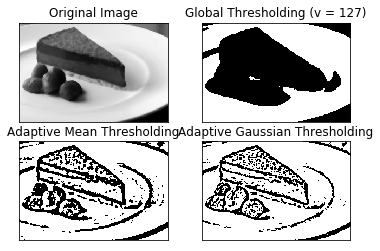

In [178]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('V:/user/college/Fall/4660/project/new_images/all/25.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

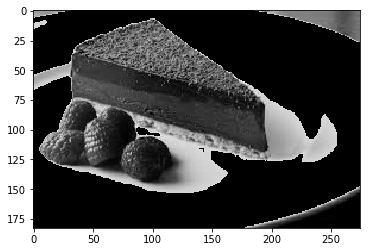

In [183]:
plt.imshow(th1,'gray')
b = cv2.bitwise_not( th1, a )
plt.imshow(b,'gray')
img = cv2.imread('V:/user/college/Fall/4660/project/new_images/all/25.jpg',0)
output = cv2.bitwise_and(img, b)
plt.imshow(output,'gray')

In [148]:
for i,image in enumerate(glob.glob("V:/user/college/Fall/4660/project/new_images/all/*.jpg")):
    img = cv2.imread(image)
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,mask = cv2.threshold(img2gray,200,255,cv2.THRESH_BINARY_INV)
    #mask_inv = cv2.bitwise_not( mask )
    img_fg = cv2.bitwise_and(img,img,mask =mask)
    b=os.path.basename(image)
    print(b)
    cv2.imwrite("V:/user/college/Fall/4660/project/new_images/maskedImages/"+b, img_fg);

1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
11.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
13.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
14.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
15.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
16.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
17.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
189.jpg
19.jpg
190.jpg
191.jpg
192.jpg
193.jpg
194.jpg
195.jpg
196.jpg
197.jpg
198.jpg
199.jpg
2.jpg
20.jpg
200.jpg
201.jpg
202.jpg
203.jpg
204.jpg
205.jpg
206.jpg
207.jpg
208.jpg
209.jpg
21.jpg
210.jpg
211.jpg
212.jpg
